In [1]:
%matplotlib inline
import qutip
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import scissor

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
vector_scissor = np.vectorize(scissor.quantum_scissor)
dimension = 5 # Multimode beam splitter doesn't work well for higher dimensions
single_photon_efficiency = 0.4
alice_transmission = 0.237*0.92
bob_transmission = 0.168*0.92

# Run for different $\alpha$

In [6]:
alpha_list = np.linspace(0, 2, 50)

fidelity_perfect, success_rate_perfect, purity_perfect = vector_scissor(alpha_list, dimension, single_photon_efficiency = 1, alice_transmission = 1, bob_transmission = 1)
#fidelity_imperfect, success_rate_imperfect, purity_imperfect = vector_scissor(alpha_list, dimension, single_photon_efficiency = single_photon_efficiency)
# fidelity_alice_loss, success_rate_alice_loss, _ = vector_scissor(alpha_list, dimension, single_photon_efficiency = single_photon_efficiency, alice_transmission = alice_transmission)
# fidelity_bob_loss, success_rate_bob_loss, _ = vector_scissor(alpha_list, dimension, single_photon_efficiency = single_photon_efficiency, bob_transmission = bob_transmission)
#fidelity_loss, success_rate_loss, purity_loss = vector_scissor(alpha_list, dimension, single_photon_efficiency = single_photon_efficiency, alice_transmission = alice_transmission, bob_transmission = bob_transmission)
fidelity10_loss, success_rate10_loss, purity10_loss = vector_scissor(alpha_list, dimension, single_photon_efficiency = single_photon_efficiency, alice_transmission = alice_transmission, bob_transmission = bob_transmission, snr = 10)
fidelity3_loss, success_rate3_loss, purity3_loss = vector_scissor(alpha_list, dimension, single_photon_efficiency = single_photon_efficiency, alice_transmission = alice_transmission, bob_transmission = bob_transmission, snr = 3)

fidelity_vac = []
for alpha in alpha_list:
    fidelity_vac.append(scissor.quantum_fidelity(qutip.coherent_dm(dimension, alpha), qutip.fock_dm(dimension, 0)))

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


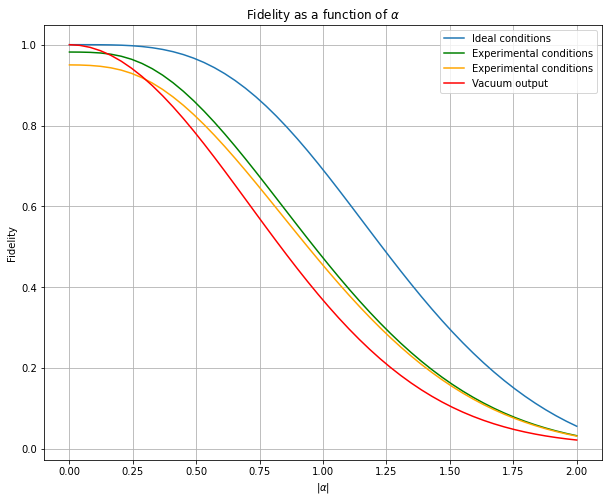

NameError: name 'success_rate_imperfect' is not defined

In [7]:
# Plots as a function of alpha
size = (10,8)

plt.figure(figsize = size)
plt.plot(alpha_list, fidelity_perfect, label = 'Ideal conditions')
#plt.plot(alpha_list, fidelity_imperfect, label = 'Single photons: ' + str(single_photon_efficiency))
#plt.plot(alpha_list, fidelity_loss, label = 'Alice transmission: ' + str(alice_transmission) + '\nBob transmission: ' + str(bob_transmission))
plt.plot(alpha_list, fidelity10_loss, color = 'green', label = 'Experimental conditions')#'Alice transmission: ' + str(alice_transmission) + '\nBob transmission: ' + str(bob_transmission))
plt.plot(alpha_list, fidelity3_loss, color = 'orange', label = 'Experimental conditions')#'Alice transmission: ' + str(alice_transmission) + '\nBob transmission: ' + str(bob_transmission))
plt.plot(alpha_list, fidelity_vac, color = 'red', label = 'Vacuum output')
# plt.plot(alpha_list, np.abs(fidelity_ideal), label = 'My simulation')
plt.grid()
plt.xlabel('$|\\alpha|$')
plt.ylabel('Fidelity')
plt.title('Fidelity as a function of $\\alpha$')
plt.legend()
plt.show()

prob_perfect = [100*p for p in success_rate_perfect]
prob_imperfect = [100*p for p in success_rate_imperfect]
prob_loss = [100*p for p in success_rate_loss]
prob10_loss = [100*p for p in success_rate10_loss]
prob3_loss = [100*p for p in success_rate3_loss]
plt.figure(figsize = size)
plt.plot(alpha_list, prob_perfect, label = 'Ideal conditions')
plt.plot(alpha_list, prob10_loss, color = 'green', label = 'Experimental conditions')
#plt.plot(alpha_list, prob_imperfect, label = 'Single photons: ' + str(single_photon_efficiency))
#plt.plot(alpha_list, prob_loss, label = 'Alice transmission: ' + str(alice_transmission) + '\nBob transmission: ' + str(bob_transmission))
plt.grid()
plt.xlabel('$|\\alpha|$')
plt.ylabel('Success rate (%)')
plt.title('Success rate as a function of $\\alpha$')
plt.legend()
plt.show()

fid_suc_perfect = fidelity_perfect*success_rate_perfect
fid_suc_imperfect = fidelity_imperfect*success_rate_imperfect
fid_suc_loss = fidelity_loss*success_rate_loss
plt.figure(figsize = size)
plt.plot(alpha_list, fid_suc_perfect, label = 'Ideal conditions')
plt.plot(alpha_list, fid_suc_imperfect, label = 'Single photons: ' + str(single_photon_efficiency))
plt.plot(alpha_list, fid_suc_loss, label = 'Alice transmission: ' + str(alice_transmission) + '\nBob transmission: ' + str(bob_transmission))
plt.grid()
plt.xlabel('|\\alpha|')
plt.ylabel('Fidelity * Success rate')
plt.title('Fidelity * success rate as a function of \\alpha')
plt.legend()
plt.show()

plt.figure(figsize = size)
plt.plot(alpha_list, purity_perfect, label = 'Ideal conditions')
plt.plot(alpha_list, purity_imperfect, label = 'Single photons: ' + str(single_photon_efficiency))
plt.plot(alpha_list, purity_loss, label = 'Alice transmission: ' + str(alice_transmission) + '\nBob transmission: ' + str(bob_transmission))
plt.grid()
plt.xlabel('$|\\alpha|$')
plt.ylabel('Purity')
plt.title('Purity as a function of $\\alpha$')
plt.legend()
plt.show()

# Run for different losses

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


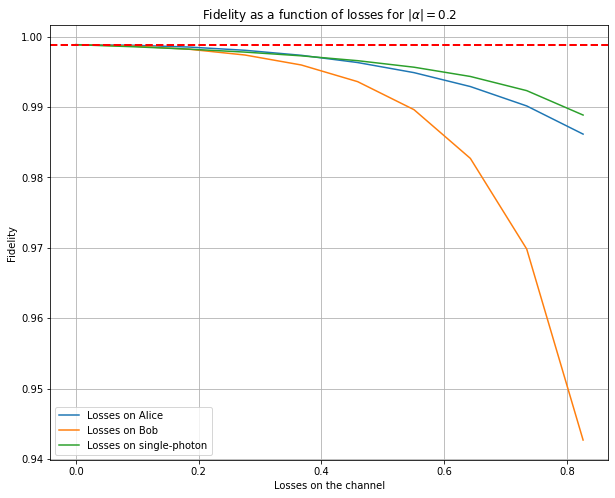

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


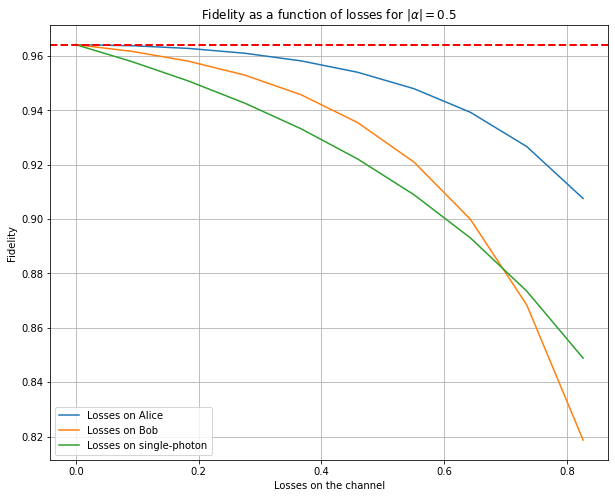

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


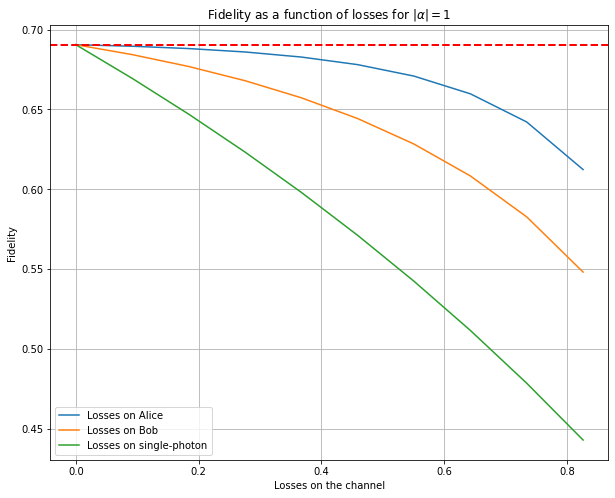

In [3]:
alphas = [0.2, 0.5, 1]
transmission = np.linspace(0.1, 1, 50)

for a in alphas:
    scissor.fid_loss(a, dimension, transmission)

# Run for different SNR

In [5]:
snr_list = np.linspace(1,50,100)

single_photon_efficiency = 0.4
alpha = 0.5

fidelity02_snr, success_rate02_snr, purity02_snr = vector_scissor(0.2, dimension, snr = snr_list)
fid_perf02, _, _ = scissor.quantum_scissor(0.2, dimension)
fidelity05_snr, success_rate05_snr, purity05_snr = vector_scissor(0.5, dimension, snr = snr_list)
fid_perf05, _, _ = scissor.quantum_scissor(0.5, dimension)
fidelity1_snr, success_rate1_snr, purity1_snr = vector_scissor(1, dimension, snr = snr_list)
fid_perf1, _, _ = scissor.quantum_scissor(1, dimension)

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


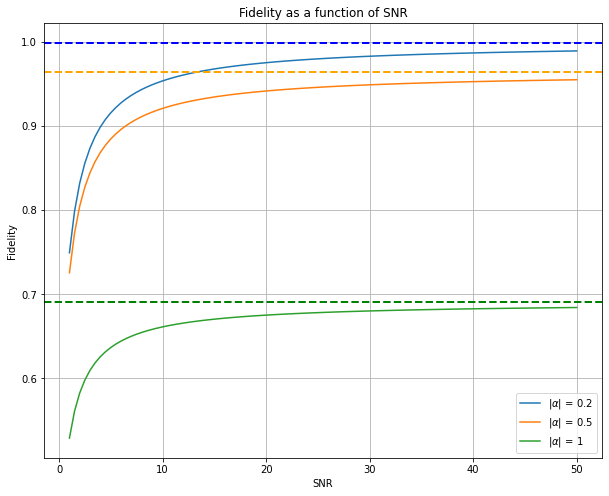

In [6]:
# Plots as a function of SNR
size = (10,8)

plt.figure(figsize = size)
plt.plot(snr_list, fidelity02_snr, label = '$|\\alpha|$ = ' + str(0.2))
plt.axhline(y = fid_perf02, color = 'blue', linestyle = '--', linewidth = 2)
plt.plot(snr_list, fidelity05_snr, label = '$|\\alpha|$ = ' + str(0.5))
plt.axhline(y = fid_perf05, color = 'orange', linestyle = '--', linewidth = 2)
plt.plot(snr_list, fidelity1_snr, label = '$|\\alpha|$ = ' + str(1))
plt.axhline(y = fid_perf1, color = 'green', linestyle = '--', linewidth = 2)
plt.grid()
plt.xlabel('SNR')
plt.ylabel('Fidelity')
plt.title('Fidelity as a function of SNR')
plt.legend()
plt.show()